# Paquete de graficación *Makie*

![Makie](https://docs.makie.org/stable/assets/bannermesh_gradient.png)

***Makie*** es un ecosistema de visualización de datos para el lenguaje de programación ***Julia***.

Es de alto desempeño, multiplataforma y extensible.

El nombre *maki-e* es japonés y se refiere a una técnica de lacado junto con polvos de oro o plata.

![maki-e](https://upload.wikimedia.org/wikipedia/commons/thumb/4/47/Makie.jpg/1024px-Makie.jpg)

In [15]:
HTML("""<embed src="https://docs.makie.org/stable" width=1000 height=400/>""")

HTML{String}("<embed src=\"https://docs.makie.org/stable\" width=1000 height=400/>")

***Makie*** tiene (hasta ahora) 3 bibliotecas principales con sus respectivos *backends* de gráficos:

- ***CairoMakie***, utiliza el *backend* ***Cairo***, para graficos vectoriales 2D no interactivos.

- ***GLMakie***, utiliza el *backend* ***OpenGL*** (*Open Graphics Library*), para gráficos 2D y 3D interactivos, corre en su propio ambiente ("ventana del sistema").

- ***WGLMakie***, utiliza el *backend* ***WebGL***, con las mismas características que ***OpenGL***, pero corre sobre navegadores *web*.

Está en planes el desarrollo de ***VulkanMakie***, que utilizaría como *backend* la biblioteca ***Vulkan*** de gráficos 2D y 3D interactivos sucesora de ***OpenGL***.

Y finalmente existe ***RPRMakie***, que está en desarrollo y aun es experimental. Usa el *backend* ***RadeonProRender***, especializado en *ray tracing*.

***Makie*** tiene tres "objetos" principales que trabajan en conjunto para realizar la graficación:
- Figura.
- Ejes.
- Gráfica.

Usaremos la biblioteca ***CairoMakie*** para iniciar la revisión del uso de ***Makie***, pero todas las instrucciones son las mismas en ***GLMakie*** o ***WGLMakie***.

In [16]:
using CairoMakie

***CairoMakie*** genera por defecto imágenes vectoriales, si se requieren usar imágenes de pixeles se puede usar la siguiente instrucción:
~~~julia
activate!(type = "png")
~~~

Para establecer el uso de imágenes vectoriales:
~~~julia
activate!(type = "svg")
~~~

## Figura

La "figura" (tipo `Figure`) establece el área de graficación principal y es un contenedor de otros elementos, como los "ejes", "barras de color", etcétera.

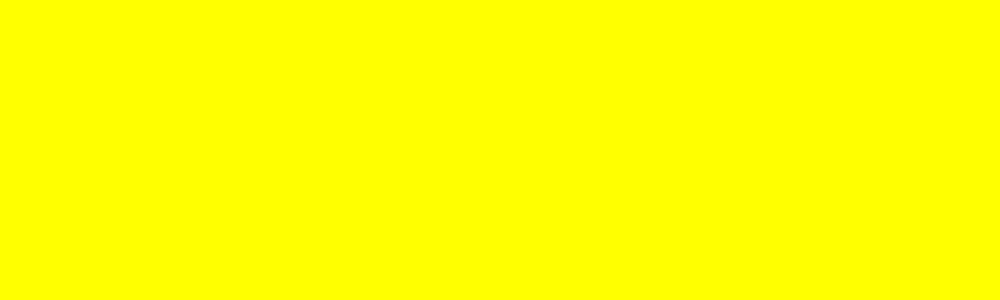

In [17]:
fig1 = Figure(backgroundcolor = :yellow, resolution=(1000,300))

Algunas notas sobre los argumentos palabra clave para la creación de "figuras" y en general:


- `backgroundcolor` establece el color de fondo. Todos los argumentos en relación a colores en ***Makie***  pueden recibir símbolos (`:`*nombrecolor*), cadenas con el nombre del color u objetos de color (`RGB`, `HSV` o `Gray`). 


- `resolution` establece el tamaño del área de graficación principal, y recibe una tupla con el ancho y el alto, en pixeles. Todos los argumentos en relación a tamaños de áreas en ***Makie*** reciben tuplas.

In [18]:
using Colors, ColorSchemes

## Ejes

Los "ejes" (tipo `Axis`) muestran los ejes coordenados y contienen las "gráficas". Al crear un "ejes" se tiene que indicar la "figura" que lo contendrá y en qué posición renglón-columna (una "figura" puede contener varios "ejes" acomodados en una tabla).

In [19]:
ax1 = Axis(fig1[1,1])

Axis with 0 plots:


Ejecutando la "figura" se redibuja con los cambios realizados.

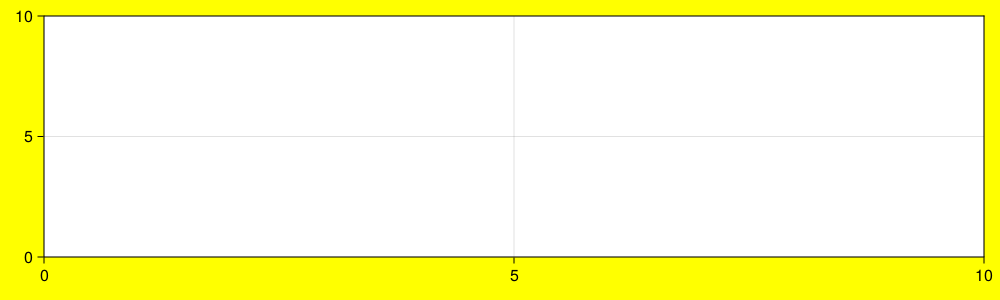

In [20]:
fig1

Añadiendo nuevos "ejes" en la posición (renglón 1, columna 2) de la "figura" antes creada.

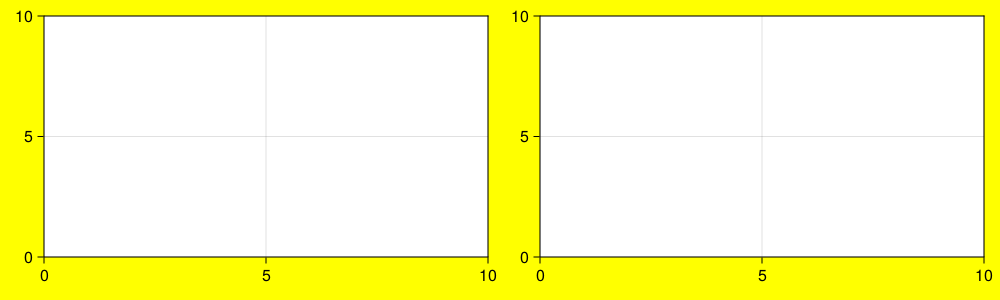

In [21]:
ax2 = Axis(fig1[1,2]) 
fig1

Los "ejes" tienen múltiples opciones de configuración:

In [22]:
?Axis

search: Axis Axis3 Axis3D axis3d axis3d! AxisAspect axislegend OldAxis



# `Axis <: Block`

A 2D axis which can be plotted into.

## Constructors

```julia
Axis(fig_or_scene; palette = nothing, kwargs...)
```

## Examples

```julia
ax = Axis(fig[1, 1])
```

## Attributes

**Axis attributes**:

  * `aspect`: The forced aspect ratio of the axis. `nothing` leaves the axis unconstrained, `DataAspect()` forces the same ratio as the ratio in data limits between x and y axis, `AxisAspect(ratio)` sets a manual ratio. Default: `nothing`
  * `autolimitaspect`: Constrains the data aspect ratio (`nothing` leaves the ratio unconstrained). Default: `nothing`
  * `backgroundcolor`: The background color of the axis. Default: `:white`
  * `bottomspinecolor`: The color of the bottom axis spine. Default: `:black`
  * `bottomspinevisible`: Controls if the bottom axis spine is visible. Default: `true`
  * `flip_ylabel`: Controls if the ylabel's rotation is flipped. Default: `false`
  * `leftspinecolor`: The color of the left axis spine. Default: `:black`
  * `leftspinevisible`: Controls if the left axis spine is visible. Default: `true`
  * `limits`: The limits that the user has manually set. They are reinstated when calling `reset_limits!` and are set to nothing by `autolimits!`. Can be either a tuple (xlow, xhigh, ylow, high) or a tuple (nothing*or*xlims, nothing*or*ylims). Are set by `xlims!`, `ylims!` and `limits!`. Default: `(nothing, nothing)`
  * `panbutton`: The button for panning. Default: `Makie.Mouse.right`
  * `rightspinecolor`: The color of the right axis spine. Default: `:black`
  * `rightspinevisible`: Controls if the right axis spine is visible. Default: `true`
  * `spinewidth`: The width of the axis spines. Default: `1.0`
  * `subtitle`: The axis subtitle string. Default: `""`
  * `subtitlecolor`: The color of the subtitle Default: `#= /opt/Julia/depot/packages/Makie/gAmAB/src/makielayout/types.jl:235 =# @inherit :textcolor :black`
  * `subtitlefont`: The font family of the subtitle. Default: `:regular`
  * `subtitlegap`: The gap between subtitle and title. Default: `0`
  * `subtitlelineheight`: The axis subtitle line height multiplier. Default: `1`
  * `subtitlesize`: The subtitle's font size. Default: `#= /opt/Julia/depot/packages/Makie/gAmAB/src/makielayout/types.jl:229 =# @inherit :fontsize 16.0f0`
  * `subtitlevisible`: Controls if the subtitle is visible. Default: `true`
  * `title`: The axis title string. Default: `""`
  * `titlealign`: The horizontal alignment of the title. Default: `:center`
  * `titlecolor`: The color of the title Default: `#= /opt/Julia/depot/packages/Makie/gAmAB/src/makielayout/types.jl:221 =# @inherit :textcolor :black`
  * `titlefont`: The font family of the title. Default: `:bold`
  * `titlegap`: The gap between axis and title. Default: `4.0`
  * `titlelineheight`: The axis title line height multiplier. Default: `1`
  * `titlesize`: The title's font size. Default: `#= /opt/Julia/depot/packages/Makie/gAmAB/src/makielayout/types.jl:213 =# @inherit :fontsize 16.0f0`
  * `titlevisible`: Controls if the title is visible. Default: `true`
  * `topspinecolor`: The color of the top axis spine. Default: `:black`
  * `topspinevisible`: Controls if the top axis spine is visible. Default: `true`
  * `xautolimitmargin`: The relative margins added to the autolimits in x direction. Default: `(0.05f0, 0.05f0)`
  * `xaxisposition`: The position of the x axis (`:bottom` or `:top`). Default: `:bottom`
  * `xgridcolor`: The color of the x grid lines. Default: `RGBAf(0, 0, 0, 0.12)`
  * `xgridstyle`: The linestyle of the x grid lines. Default: `nothing`
  * `xgridvisible`: Controls if the x grid lines are visible. Default: `true`
  * `xgridwidth`: The width of the x grid lines. Default: `1.0`
  * `xlabel`: The xlabel string. Default: `""`
  * `xlabelcolor`: The color of the xlabel. Default: `#= /opt/Julia/depot/packages/Makie/gAmAB/src/makielayout/types.jl:243 =# @inherit :textcolor :black`
  * `xlabelfont`: The font family of the xlabel. Default: `:regular`
  * `xlabelpadding`: The padding between the xlabel and the ticks or axis. Default: `3.0`
  * `xlabelrotation`: The xlabel rotation in radians. Default: `Makie.automatic`
  * `xlabelsize`: The font size of the xlabel. Default: `#= /opt/Julia/depot/packages/Makie/gAmAB/src/makielayout/types.jl:247 =# @inherit :fontsize 16.0f0`
  * `xlabelvisible`: Controls if the xlabel is visible. Default: `true`
  * `xminorgridcolor`: The color of the x minor grid lines. Default: `RGBAf(0, 0, 0, 0.05)`
  * `xminorgridstyle`: The linestyle of the x minor grid lines. Default: `nothing`
  * `xminorgridvisible`: Controls if the x minor grid lines are visible. Default: `false`
  * `xminorgridwidth`: The width of the x minor grid lines. Default: `1.0`
  * `xminortickalign`: The alignment of x minor ticks on the axis spine Default: `0.0`
  * `xminortickcolor`: The tick color of x minor ticks Default: `:black`
  * `xminorticks`: The tick locator for the x minor ticks Default: `IntervalsBetween(2)`
  * `xminorticksize`: The tick size of x minor ticks Default: `4.0`
  * `xminorticksvisible`: Controls if minor ticks on the x axis are visible Default: `false`
  * `xminortickwidth`: The tick width of x minor ticks Default: `1.0`
  * `xpankey`: The key for limiting panning to the x direction. Default: `Makie.Keyboard.x`
  * `xpanlock`: Locks interactive panning in the x direction. Default: `false`
  * `xrectzoom`: Controls if rectangle zooming affects the x dimension. Default: `true`
  * `xreversed`: Controls if the x axis goes rightwards (false) or leftwards (true) Default: `false`
  * `xscale`: The x axis scale Default: `identity`
  * `xtickalign`: The alignment of the xtick marks relative to the axis spine (0 = out, 1 = in). Default: `0.0`
  * `xtickcolor`: The color of the xtick marks. Default: `RGBf(0, 0, 0)`
  * `xtickformat`: Format for xticks. Default: `Makie.automatic`
  * `xticklabelalign`: The horizontal and vertical alignment of the xticklabels. Default: `Makie.automatic`
  * `xticklabelcolor`: The color of xticklabels. Default: `#= /opt/Julia/depot/packages/Makie/gAmAB/src/makielayout/types.jl:267 =# @inherit :textcolor :black`
  * `xticklabelfont`: The font family of the xticklabels. Default: `:regular`
  * `xticklabelpad`: The space between xticks and xticklabels. Default: `2.0`
  * `xticklabelrotation`: The counterclockwise rotation of the xticklabels in radians. Default: `0.0`
  * `xticklabelsize`: The font size of the xticklabels. Default: `#= /opt/Julia/depot/packages/Makie/gAmAB/src/makielayout/types.jl:271 =# @inherit :fontsize 16.0f0`
  * `xticklabelspace`: The space reserved for the xticklabels. Default: `Makie.automatic`
  * `xticklabelsvisible`: Controls if the xticklabels are visible. Default: `true`
  * `xticks`: The xticks. Default: `Makie.automatic`
  * `xticksize`: The size of the xtick marks. Default: `6.0`
  * `xticksmirrored`: Controls if the x ticks and minor ticks are mirrored on the other side of the Axis. Default: `false`
  * `xticksvisible`: Controls if the xtick marks are visible. Default: `true`
  * `xtickwidth`: The width of the xtick marks. Default: `1.0`
  * `xtrimspine`: Controls if the x spine is limited to the furthest tick marks or not. Default: `false`
  * `xzoomkey`: The key for limiting zooming to the x direction. Default: `Makie.Keyboard.x`
  * `xzoomlock`: Locks interactive zooming in the x direction. Default: `false`
  * `yautolimitmargin`: The relative margins added to the autolimits in y direction. Default: `(0.05f0, 0.05f0)`
  * `yaxisposition`: The position of the y axis (`:left` or `:right`). Default: `:left`
  * `ygridcolor`: The color of the y grid lines. Default: `RGBAf(0, 0, 0, 0.12)`
  * `ygridstyle`: The linestyle of the y grid lines. Default: `nothing`
  * `ygridvisible`: Controls if the y grid lines are visible. Default: `true`
  * `ygridwidth`: The width of the y grid lines. Default: `1.0`
  * `ylabel`: The ylabel string. Default: `""`
  * `ylabelcolor`: The color of the ylabel. Default: `#= /opt/Julia/depot/packages/Makie/gAmAB/src/makielayout/types.jl:245 =# @inherit :textcolor :black`
  * `ylabelfont`: The font family of the ylabel. Default: `:regular`
  * `ylabelpadding`: The padding between the ylabel and the ticks or axis. Default: `5.0`
  * `ylabelrotation`: The ylabel rotation in radians. Default: `Makie.automatic`
  * `ylabelsize`: The font size of the ylabel. Default: `#= /opt/Julia/depot/packages/Makie/gAmAB/src/makielayout/types.jl:249 =# @inherit :fontsize 16.0f0`
  * `ylabelvisible`: Controls if the ylabel is visible. Default: `true`
  * `yminorgridcolor`: The color of the y minor grid lines. Default: `RGBAf(0, 0, 0, 0.05)`
  * `yminorgridstyle`: The linestyle of the y minor grid lines. Default: `nothing`
  * `yminorgridvisible`: Controls if the y minor grid lines are visible. Default: `false`
  * `yminorgridwidth`: The width of the y minor grid lines. Default: `1.0`
  * `yminortickalign`: The alignment of y minor ticks on the axis spine Default: `0.0`
  * `yminortickcolor`: The tick color of y minor ticks Default: `:black`
  * `yminorticks`: The tick locator for the y minor ticks Default: `IntervalsBetween(2)`
  * `yminorticksize`: The tick size of y minor ticks Default: `4.0`
  * `yminorticksvisible`: Controls if minor ticks on the y axis are visible Default: `false`
  * `yminortickwidth`: The tick width of y minor ticks Default: `1.0`
  * `ypankey`: The key for limiting panning to the y direction. Default: `Makie.Keyboard.y`
  * `ypanlock`: Locks interactive panning in the y direction. Default: `false`
  * `yrectzoom`: Controls if rectangle zooming affects the y dimension. Default: `true`
  * `yreversed`: Controls if the y axis goes upwards (false) or downwards (true) Default: `false`
  * `yscale`: The y axis scale Default: `identity`
  * `ytickalign`: The alignment of the ytick marks relative to the axis spine (0 = out, 1 = in). Default: `0.0`
  * `ytickcolor`: The color of the ytick marks. Default: `RGBf(0, 0, 0)`
  * `ytickformat`: Format for yticks. Default: `Makie.automatic`
  * `yticklabelalign`: The horizontal and vertical alignment of the yticklabels. Default: `Makie.automatic`
  * `yticklabelcolor`: The color of yticklabels. Default: `#= /opt/Julia/depot/packages/Makie/gAmAB/src/makielayout/types.jl:269 =# @inherit :textcolor :black`
  * `yticklabelfont`: The font family of the yticklabels. Default: `:regular`
  * `yticklabelpad`: The space between yticks and yticklabels. Default: `4.0`
  * `yticklabelrotation`: The counterclockwise rotation of the yticklabels in radians. Default: `0.0`
  * `yticklabelsize`: The font size of the yticklabels. Default: `#= /opt/Julia/depot/packages/Makie/gAmAB/src/makielayout/types.jl:273 =# @inherit :fontsize 16.0f0`
  * `yticklabelspace`: The space reserved for the yticklabels. Default: `Makie.automatic`
  * `yticklabelsvisible`: Controls if the yticklabels are visible. Default: `true`
  * `yticks`: The yticks. Default: `Makie.automatic`
  * `yticksize`: The size of the ytick marks. Default: `6.0`
  * `yticksmirrored`: Controls if the y ticks and minor ticks are mirrored on the other side of the Axis. Default: `false`
  * `yticksvisible`: Controls if the ytick marks are visible. Default: `true`
  * `ytickwidth`: The width of the ytick marks. Default: `1.0`
  * `ytrimspine`: Controls if the y spine is limited to the furthest tick marks or not. Default: `false`
  * `yzoomkey`: The key for limiting zooming to the y direction. Default: `Makie.Keyboard.y`
  * `yzoomlock`: Locks interactive zooming in the y direction. Default: `false`

**Layout attributes**:

  * `alignmode`: The align mode of the axis in its parent GridLayout. Default: `Inside()`
  * `halign`: The horizontal alignment of the axis within its suggested bounding box. Default: `:center`
  * `height`: The height of the axis. Default: `nothing`
  * `tellheight`: Controls if the parent layout can adjust to this element's height Default: `true`
  * `tellwidth`: Controls if the parent layout can adjust to this element's width Default: `true`
  * `valign`: The vertical alignment of the axis within its suggested bounding box. Default: `:center`
  * `width`: The width of the axis. Default: `nothing`


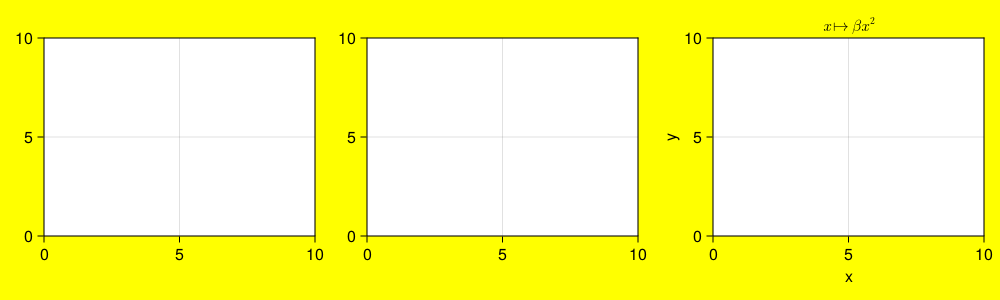

In [23]:
ax3 = Axis(fig1[1,3], title=L"x\mapsto\beta x^2", xlabel="x", ylabel="y") 
fig1

Se pueden reconfigurar los "ejes".

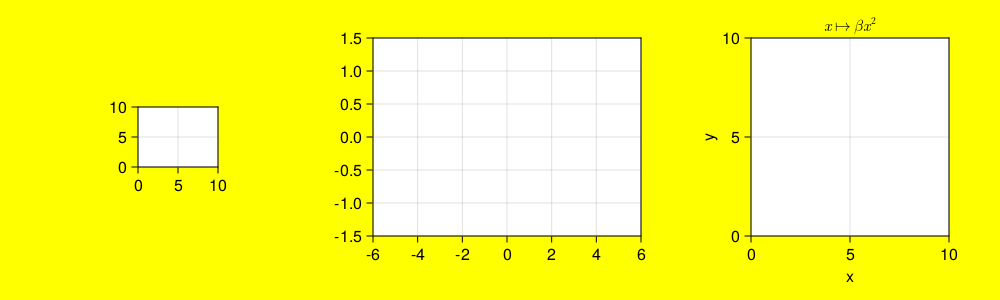

In [24]:
ax1.tellwidth, ax1.tellheight = false,false # Que no se reescale autoaticamente el tamaño
ax1.width, ax1.height = 80, 60 # Nuevo tamaño
limits!(ax2,-6,6,-1.5,1.5) # Nuevos límites de coordenadas
ax3.aspect = AxisAspect(1) # Nueva relación de aspecto. Por ejemplo, 1 es cuadrado, 2 rectángulo ancho y 0.5 rectángulo alto
fig1

## Gráficas

Una "gráfica" es el dibujo o representación visual de los datos que se proporcionen. Al crear una "gráfica" se tiene que indicar qué "ejes" la contendrá.

Hay muchos tipos de "gráficas" en ***Makie***.

Comencemos con la *function* `lines!`, que sirve para dibujar listas de puntos, donde los consecutivos está unidos por segmentos de recta.

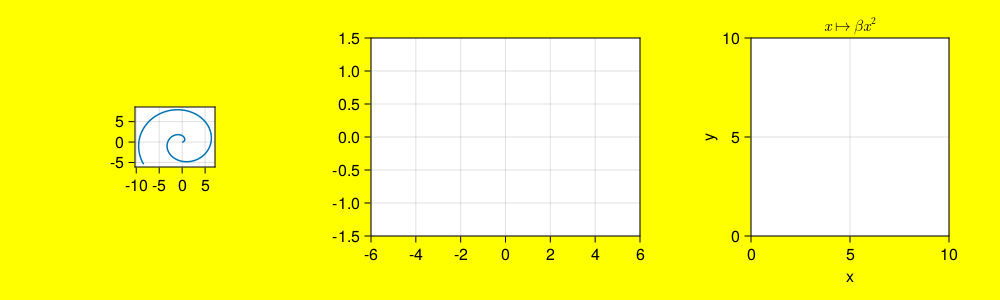

In [25]:
# Las coordenadas de los puntos se deben dar en coordenadas separadas.
xs = [ t*cos(t) for t in 0:0.01:10 ]
ys = [ t*sin(t) for t in 0:0.01:10 ]

lines!(ax1, xs, ys)

fig1

Se pueden hacer gráficas de funciones $f:\mathbb{R}\rightarrow\mathbb{R}$ directamente con `lines!`.

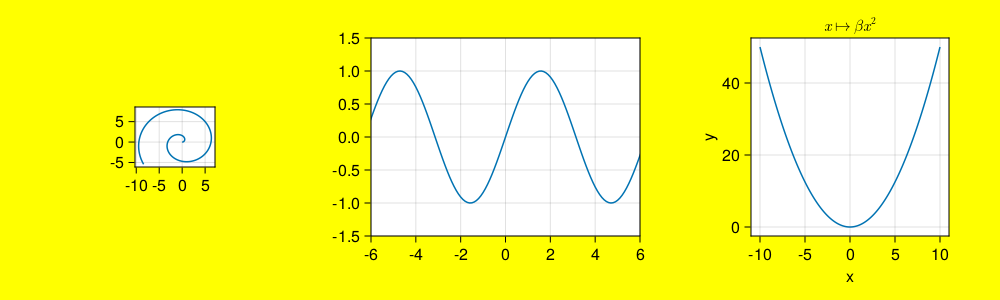

In [26]:
lines!(ax2, -10:0.1:10, sin)
lines!(ax3, -10:0.1:10, x -> 0.5x^2)
fig1

Se pueden añadir varias "gráficas" a los mismos "ejes".

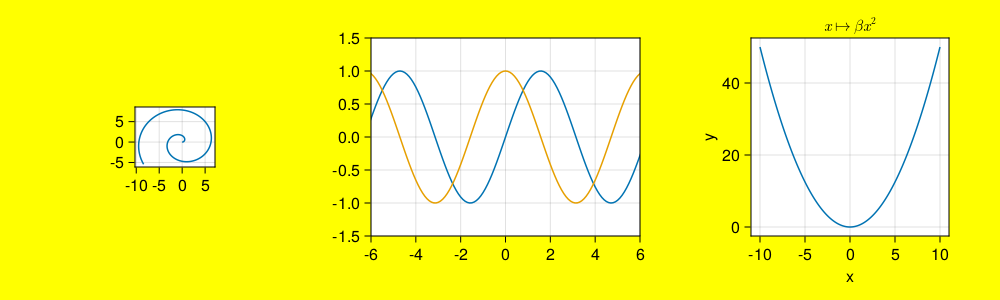

In [27]:
lines!(ax2, -10:0.1:10, cos)
fig1

### `lines`

La *function* `lines` permite crear directamente una "gráfica" de líneas sin indicar los "ejes", pero crea nuevos "ejes" y "figura".

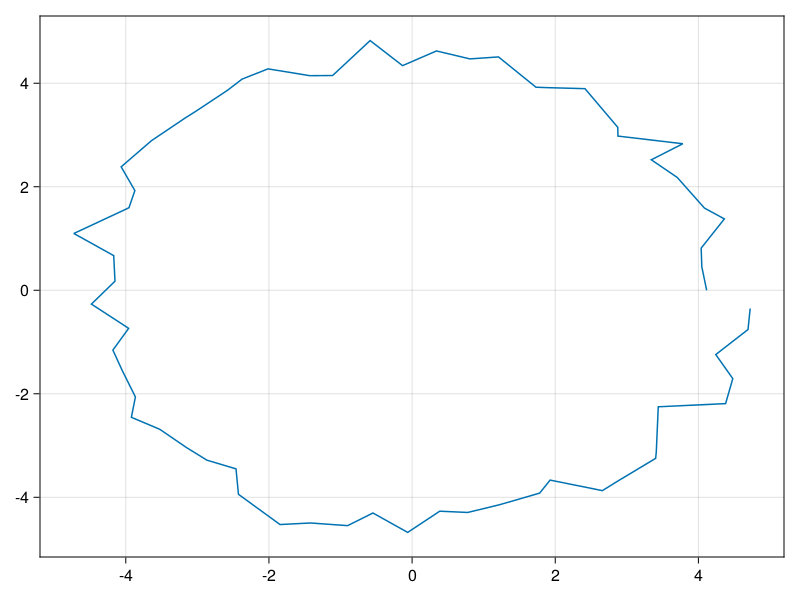

In [28]:
xsrand = [ (rand()+4)*cos(t) for t in 0:0.1:2π ]
ysrand = [ (rand()+4)*sin(t) for t in 0:0.1:2π ]

lines(xsrand, ysrand)

En realidad, la *function* `lines` regresa una tupla que contiene una "figura", unos "ejes" y una "gráfica". 

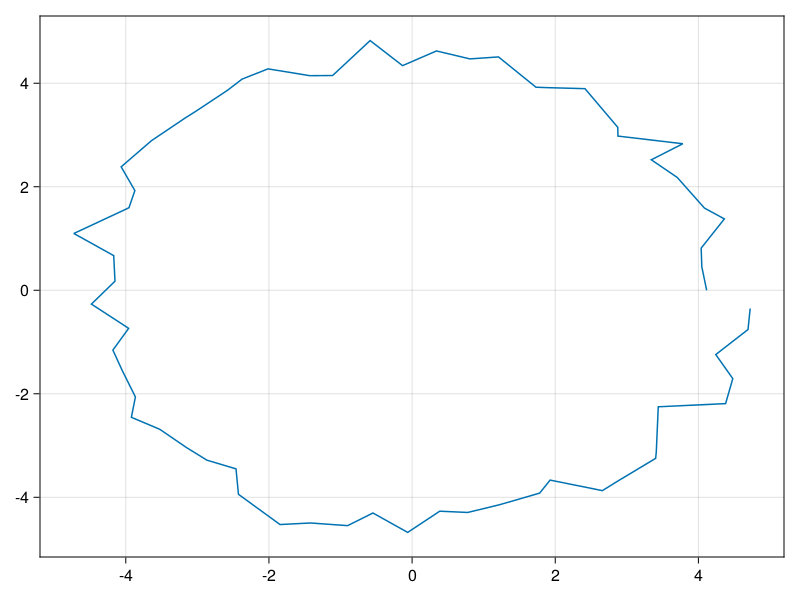

In [29]:
fig, ax, plt = lines(xsrand, ysrand)

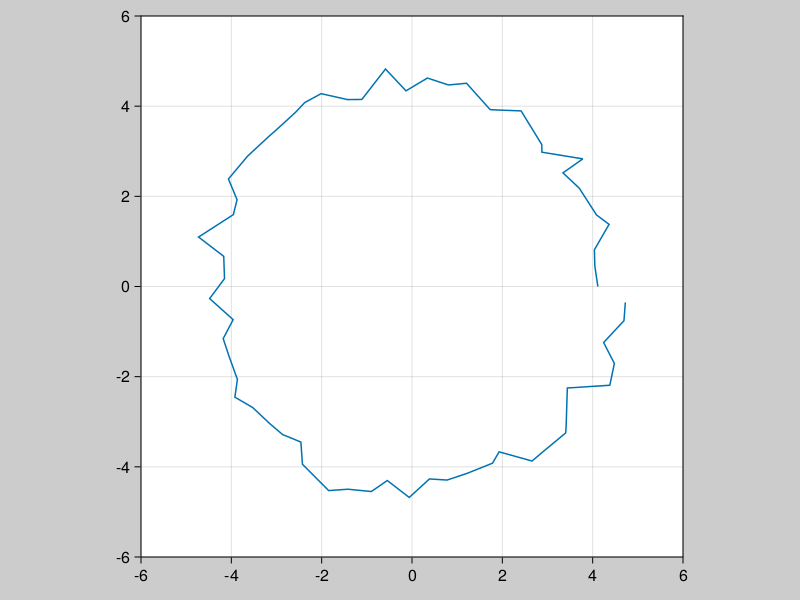

In [30]:
fig.scene.backgroundcolor = RGB(0.8,0.8,0.8)
# La resolución de la figura o escena no puede ser cambiada!
ax.limits = (-6,6,-6,6)
ax.aspect = AxisAspect(1)

fig

También es posible pasar las configuraciones para la "figura" y "ejes".

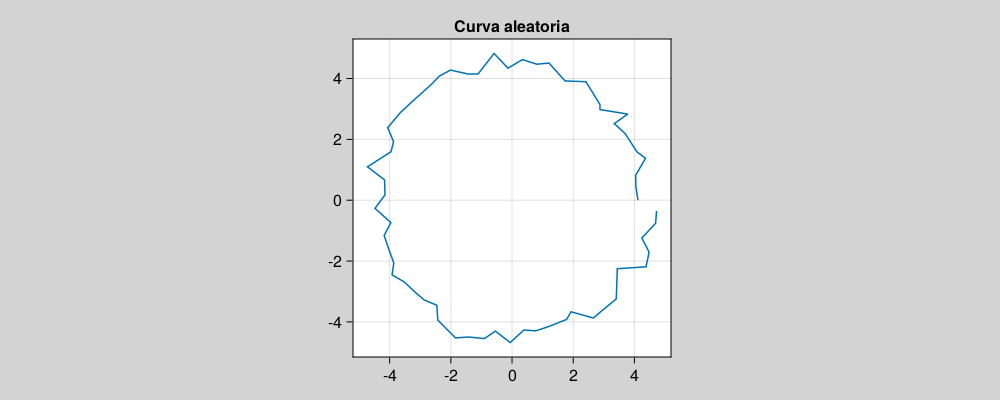

In [31]:
fig, ax, plt = lines(xsrand, ysrand,
    figure = (; resolution = (1000,400), backgroundcolor=:lightgray),
    axis = (; title = "Curva aleatoria", aspect = 1)) # Esto es equivalente a aspect=AxisAspect(1)

En lugar de listas de coordenadas, también se pueden usar listas de puntos de ***Makie***.

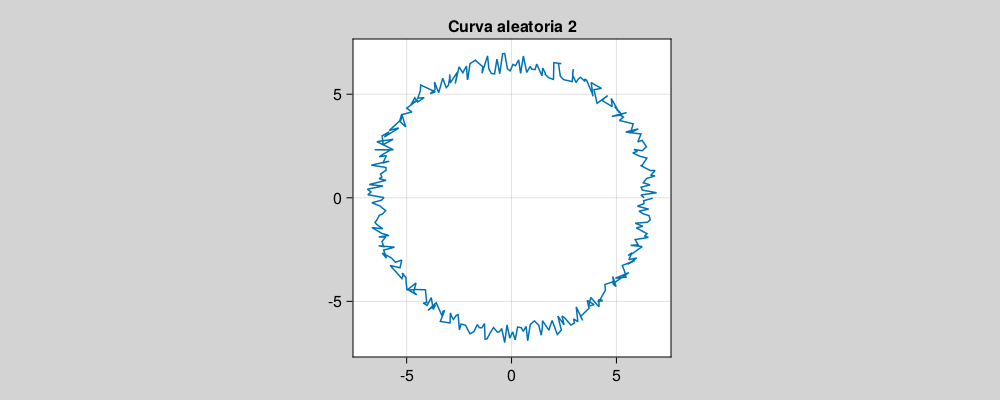

In [32]:
fig2, axc2, plt2 = lines([ Point( (6+rand())*cos(t), (6+rand())*sin(t)) for t in 0:0.02:2π ],
    figure = (;resolution = (1000,400), backgroundcolor=:lightgray),
    axis = (; title = "Curva aleatoria 2", aspect = AxisAspect(1)))

Claro, `lines` también es muy configurable.

In [33]:
?lines

search: lines lines! Lines linesegments linesegments! LineSegments vlines hlines



```
lines(positions)
lines(x, y)
lines(x, y, z)
```

Creates a connected line plot for each element in `(x, y, z)`, `(x, y)` or `positions`.

`NaN` values are displayed as gaps in the line.

## Attributes

### Specific

  * `cycle::Vector{Symbol} = [:color]` sets which attributes to cycle when creating multiple plots.
  * `linestyle::Union{Nothing, Symbol, Vector} = nothing` sets the pattern of the line (e.g. `:solid`, `:dot`, `:dashdot`)
  * `linewidth::Real = 1.5` sets the width of the line in pixel units.

### Generic

  * `visible::Bool = true` sets whether the plot will be rendered or not.
  * `overdraw::Bool = false` sets whether the plot will draw over other plots. This specifically means ignoring depth checks in GL backends.
  * `transparency::Bool = false` adjusts how the plot deals with transparency. In GLMakie `transparency = true` results in using Order Independent Transparency.
  * `fxaa::Bool = false` adjusts whether the plot is rendered with fxaa (anti-aliasing). Note that line plots already use a different form of anti-aliasing.
  * `inspectable::Bool = true` sets whether this plot should be seen by `DataInspector`.
  * `depth_shift::Float32 = 0f0` adjusts the depth value of a plot after all other transformations, i.e. in clip space, where `0 <= depth <= 1`. This only applies to GLMakie and WGLMakie and can be used to adjust render order (like a tunable overdraw).
  * `model::Makie.Mat4f` sets a model matrix for the plot. This replaces adjustments made with `translate!`, `rotate!` and `scale!`.
  * `color` sets the color of the plot. It can be given as a named color `Symbol` or a `Colors.Colorant`. Transparency can be included either directly as an alpha value in the `Colorant` or as an additional float in a tuple `(color, alpha)`. The color can also be set for each point in the line by passing a `Vector` of colors or be used to index the `colormap` by passing a `Real` number or `Vector{<: Real}`.
  * `colormap::Union{Symbol, Vector{<:Colorant}} = :viridis` sets the colormap that is sampled for numeric `color`s.
  * `colorrange::Tuple{<:Real, <:Real}` sets the values representing the start and end points of `colormap`.
  * `nan_color::Union{Symbol, <:Colorant} = RGBAf(0,0,0,0)` sets a replacement color for `color = NaN`.
  * `space::Symbol = :data` sets the transformation space for line position. See `Makie.spaces()` for possible inputs.


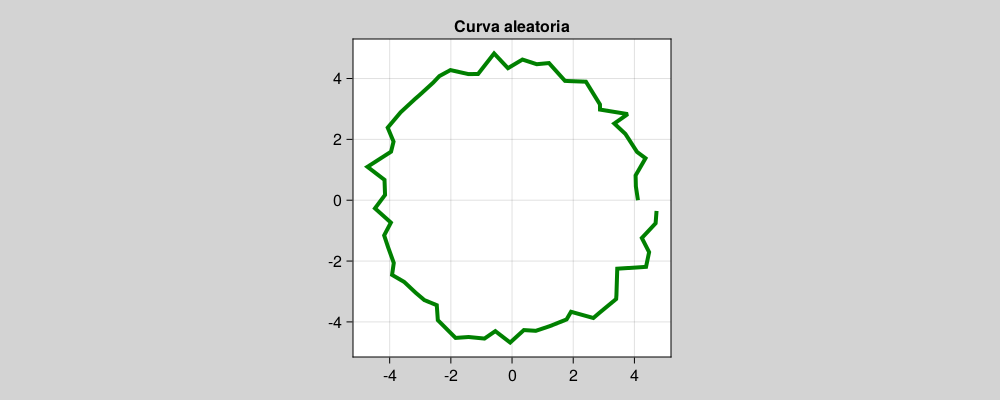

In [34]:
plt.linewidth = 4
plt.color = :green
fig

### `scatter`

*Function* para dibujar puntos que no serán unidos por líneas. Los puntos pueden ser representados por distintos tipos de *marcadores*, con distintos tamaños y colores.

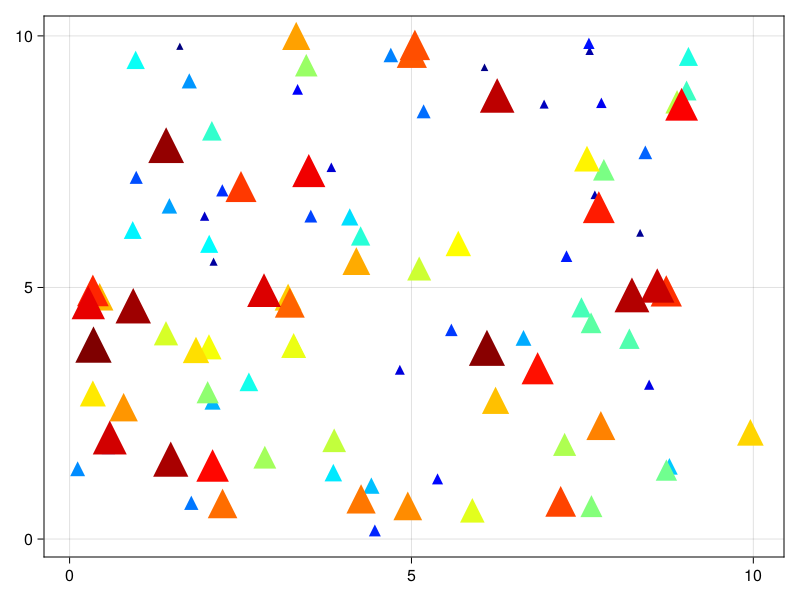

In [35]:
scatter([ Point(10rand(), 10rand()) for t in 1:100 ],
    marker = :utriangle,
    markersize = range(10, 50, length=100),
    color = range(0, 1, length=100),
    colormap = :jet
)

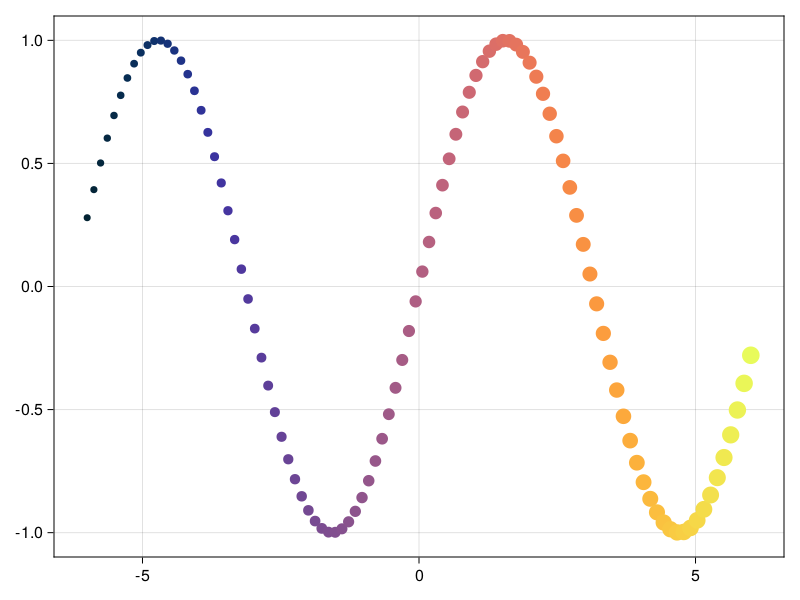

In [36]:
scatter(range(-6,6, length=100), sin,
    markersize = range(10, 25, length=100),
    color = range(0, 1, length=100),
    colormap = :thermal
)

### poly

*Function* para dibujar polígonos y círculos.

En la subbliioteca `Makie.GeometryBasics` están muchas instruciones complementarias para `poly`.

In [37]:
using Makie.GeometryBasics

Polígono general.

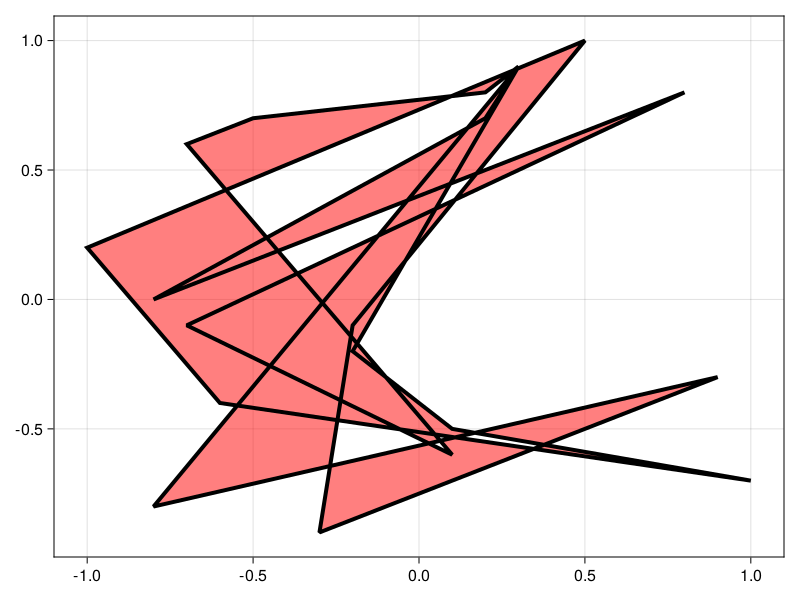

In [38]:
poly([ Point(rand(-1:0.1:1),rand(-1:0.1:1)) for n in 1:20 ],
    color = RGBA(1,0,0,0.5), strokecolor = :black, strokewidth = 4)

Rectángulos.

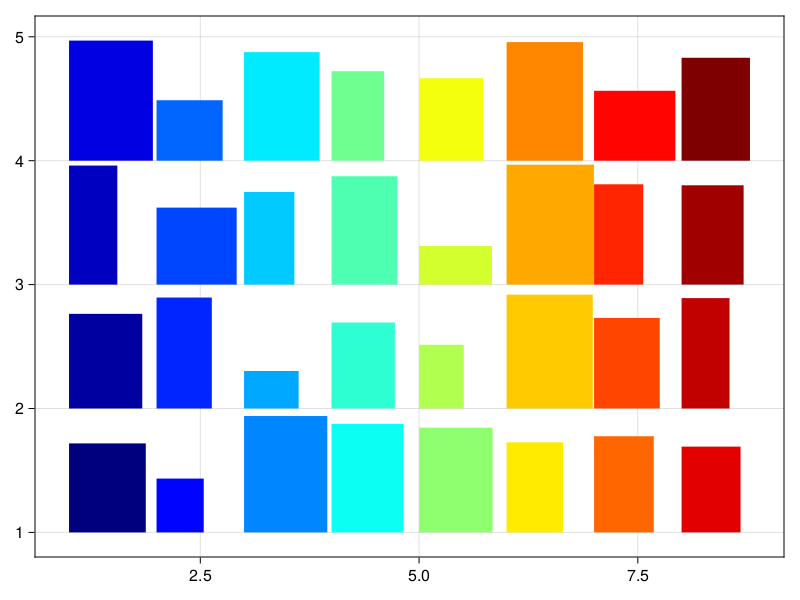

In [39]:
poly([Rect(i, j, 0.5rand()+0.5, 0.75rand()+0.25) for i in 1:8 for j in 1:4], color = 1:32, colormap = :jet)

Círculos.

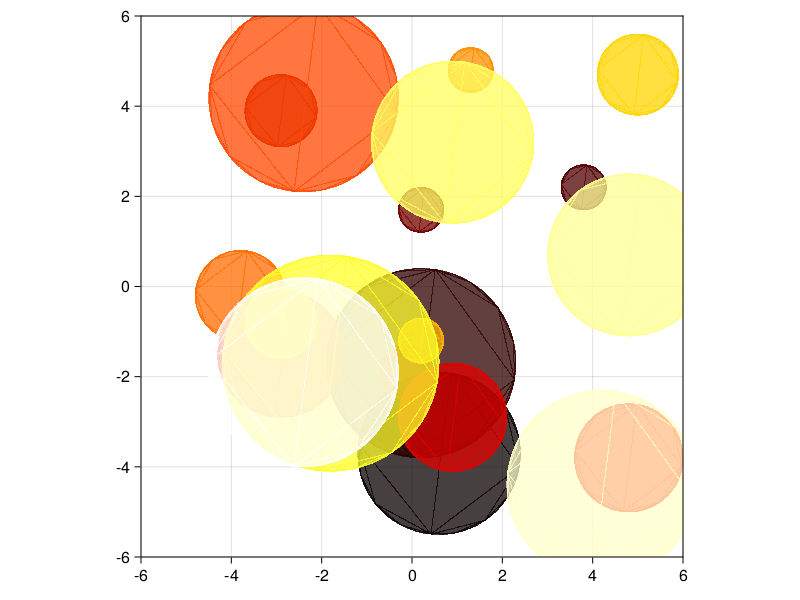

In [40]:
poly([Circle(Point(rand(-5:0.1:5), rand(-5:0.1:5)), rand(0.5:0.1:2.5)) for n in 1:20],
    color = 1:20, colormap = (:hot, 0.75), axis=(; limits=(-6,6,-6,6), aspect=1))

### `heatmap`

Los *mapas de calor* son representaciones de datos $(x,y)\mapsto f(x,y)$, donde a cada valor $f(x,y)$ se le asigna un color.

In [41]:
f(x,y) = cos(x)*sin(y)

f (generic function with 1 method)

In [42]:
vals = [ f(x,y) for x in -3:0.2:3, y in -3:0.2:3 ]

31×31 Matrix{Float64}:
  0.139708     0.331636     0.510342   …  -0.331636    -0.139708
  0.132966     0.315633     0.485717      -0.315633    -0.132966
  0.120924     0.287048     0.441727      -0.287048    -0.120924
  0.104061     0.247018     0.380127      -0.247018    -0.104061
  0.0830493    0.197141     0.303373      -0.197141    -0.0830493
  0.0587266    0.139404     0.214524   …  -0.139404    -0.0587266
  0.0320628    0.07611      0.117123      -0.07611     -0.0320628
  0.00412064   0.00978149   0.0150524     -0.00978149  -0.00412064
 -0.0239858   -0.056937    -0.0876183      0.056937     0.0239858
 -0.0511359   -0.121386    -0.186796       0.121386     0.0511359
 -0.0762475   -0.180995    -0.278527   …   0.180995     0.0762475
 -0.0983193   -0.233388    -0.359153       0.233388     0.0983193
 -0.116471    -0.276478    -0.425462       0.276478     0.116471
  ⋮                                    ⋱                ⋮
 -0.0983193   -0.233388    -0.359153       0.233388     0.0983193

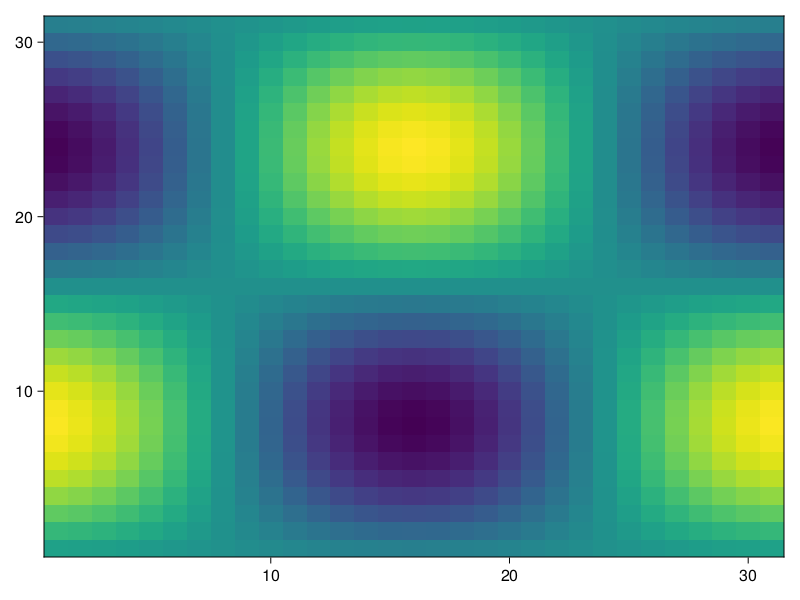

In [43]:
hmfig, hmax, hmplt = heatmap(vals)

Se pueden especificar los límites apropiados de coordenadas.

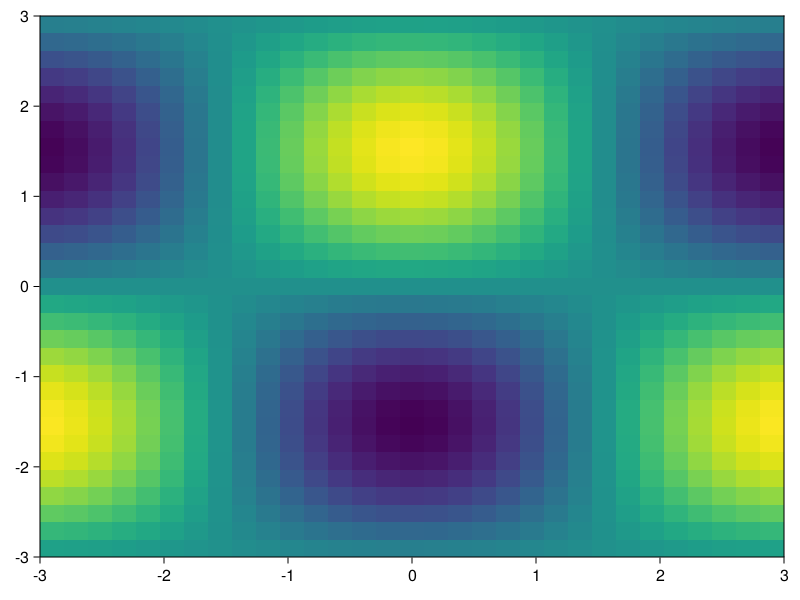

In [44]:
hmfig, hmax, hmplt = heatmap(-3:3, -3:3, vals)

Claro, también se puede cambiar en mapa de color. Algo adicional para mapas de calor es la interpolación de valores.

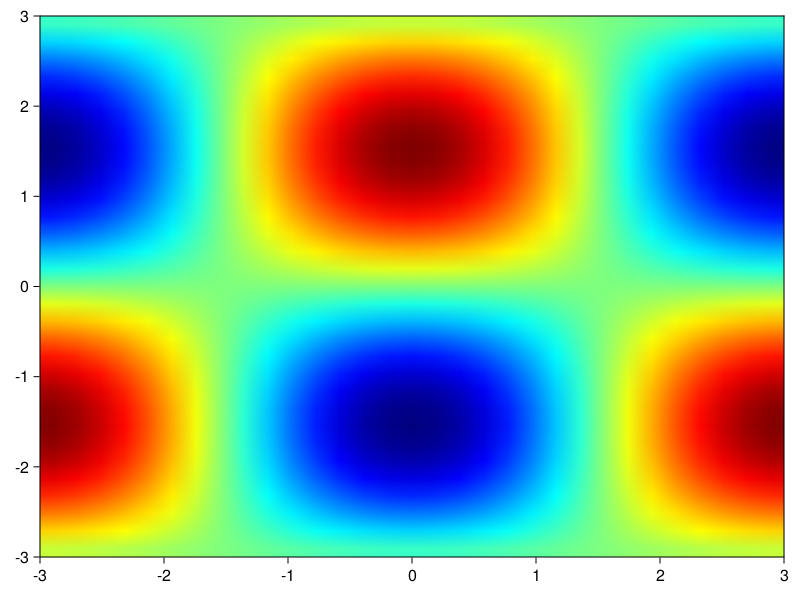

In [45]:
hmfig, hmax, hmplt = heatmap(-3:3, -3:3, vals, colormap = :jet, interpolate = true)

Para los mapas de calor es importante saber a que valores corresponden los colores. Esto se puede hacer con `Colorbar`.

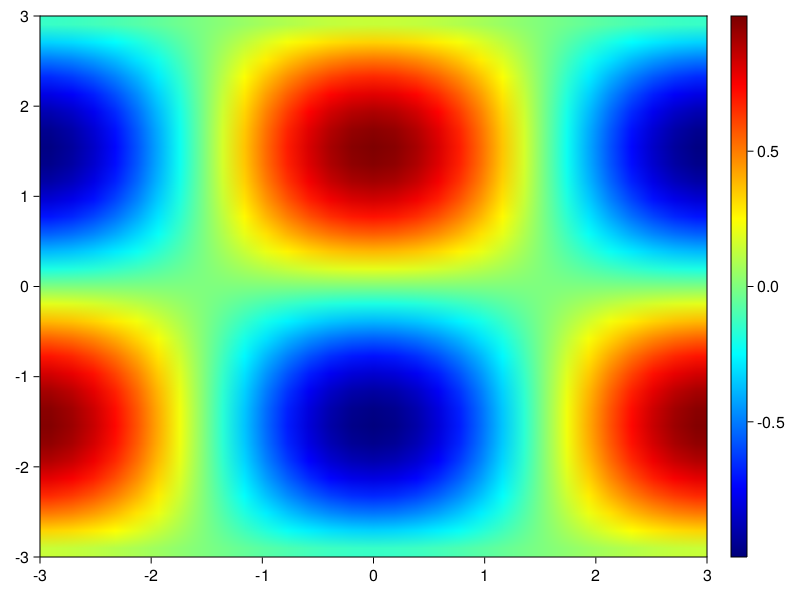

In [46]:
Colorbar(hmfig[1,2], hmplt)
hmfig

### Imágenes

Se pueden usar imágenes de ***Images*** con ***Makie***.

In [47]:
using FileIO #, Images # No es necesario cargar Images

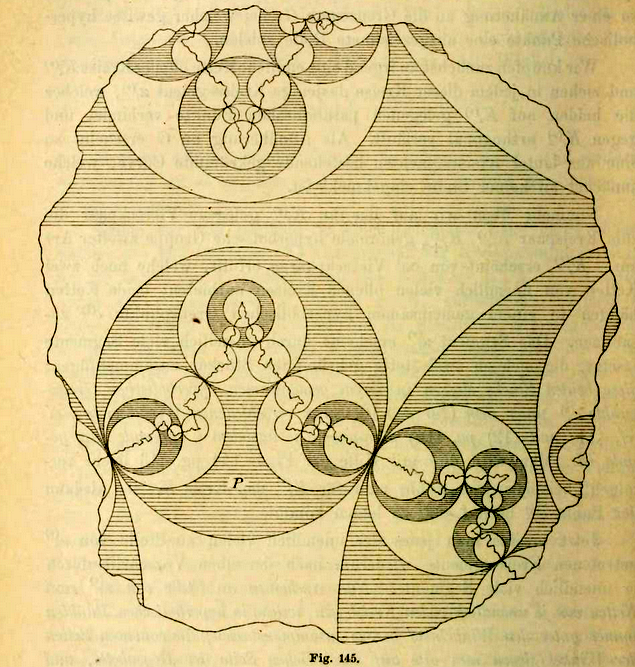

In [48]:
img = load("Klein.png")

[Nota técnica:

Pero si queremos mostrar imágenes en el *notebook* y usar ***Makie***, conviene "importar" ***Images*** (no "usar", y llamar a sus *functions* con su nombre de módulo en algunos casos), pues hay nombres de *functions* y *structs* que coinciden en  ambas bibliotecas.) ]

In [49]:
import Images

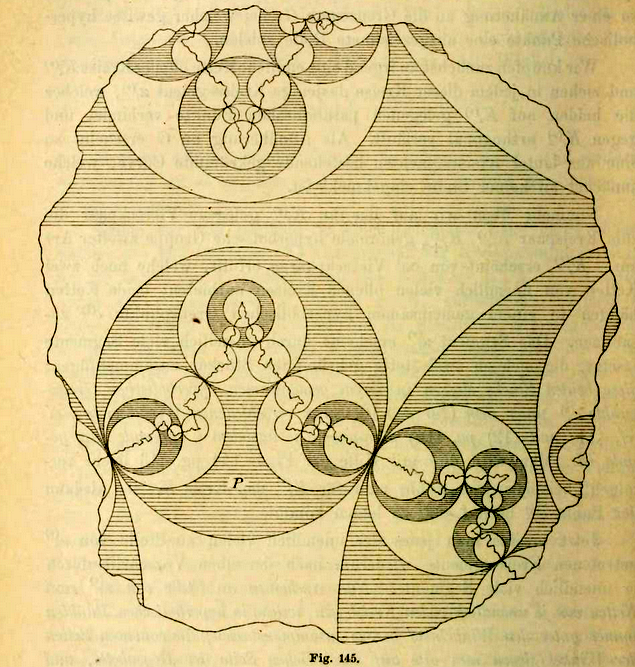

In [50]:
img

Con la *function* `image` se puede mostrar la imagen dentro de unos "ejes" dentro de una "figura".

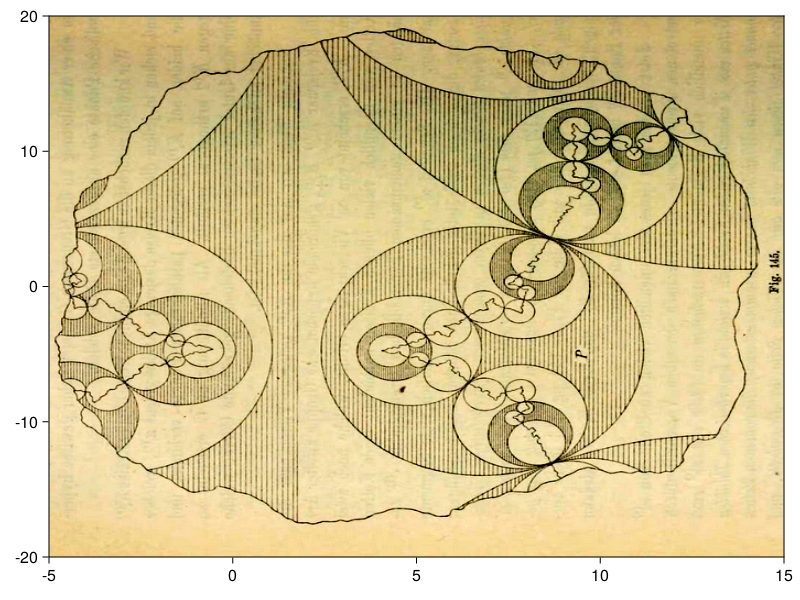

In [51]:
imffig, imgax, imgplt = image(-5:15, -20:20, img)

Nótese que la imagen está girada $90°$, entonces para mostrarla correctamente hay que rotarla $-90°$.

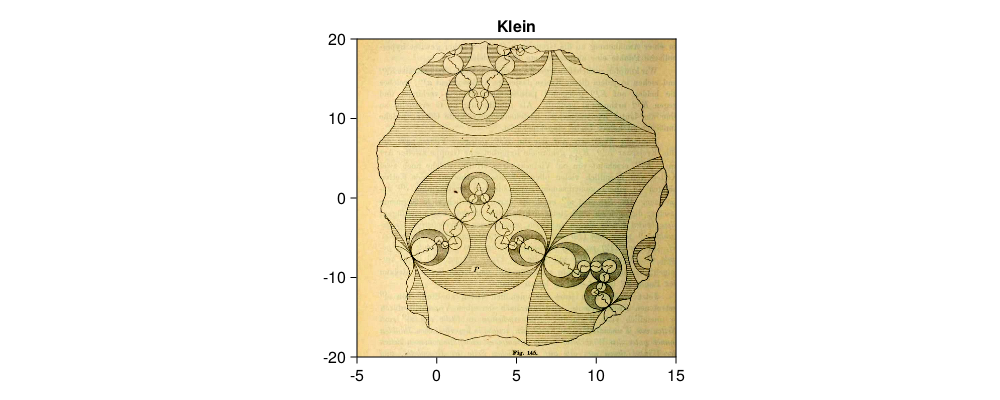

In [52]:
imffig, imgax, imgplt = image(-5:15, -20:20, rotr90(img),
    figure=(; resolution=(1000,400)), axis=(; title="Klein", aspect=1))

Para los algoritmos de dibujo que naturalmente requieren una imagen de pixeles (como el de tiempo de escape para puntos atrapados o el de preimágenes, o incluso los de atractores de IFS o mapas de densidad)...

...cuál será la implementación más eficiente usando ***Makie***: ¿crear una imagen y luego graficarla con `image` o crear una matriz de valores y luego graficarla con `heatmap`?

In [53]:
function imagetrappedpoints(f::Function; maxiterations::Int=100, bound2=4,
    size=(400,400), res=(600,420), limits=(-2,2,-2,2), colormap=colorschemes[:jet])
    w,h = size
    xmin,xmax,ymin,ymax = limits
    Δx,Δy = (xmax-xmin)/w, (ymax-ymin)/h
    img = zeros(RGB{Float64}, h,w)
    y = ymax
    for n in 1:h
        x = xmin
        for m in 1:w
            z = complex(x,y)
            colorindex = 1.0
            for k in 1:maxiterations
                if abs(z) > bound2
                    colorindex = k/maxiterations
                    break
                end
                z = f(z)
            end
            img[n,m] = colormap[colorindex]
            x += Δx
        end
        y -= Δy
    end
    #img
    image(xmin:xmax, ymin:ymax, rotr90(img), # Hay que rotar la imagen!!!
        figure=(;resolution=res), axis=(;aspect=AxisAspect(w/h)))
end

imagetrappedpoints (generic function with 1 method)

  0.303183 seconds (91.79 k allocations: 79.388 MiB, 14.38% compilation time)


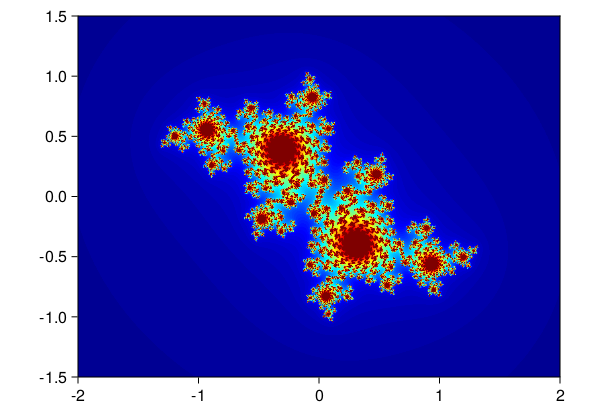

In [100]:
@time imagetrappedpoints(z -> z^2 -0.25 + 0.65im, size=(1200,900), limits=(-2,2,-1.5,1.5))

In [97]:
function heatmaptrappedpoints(f::Function; maxiterations::Int=100, bound2=4,
    size=(400,400), res=(600,420), limits=(-2,2,-2,2), colormap=colorschemes[:jet])
    w,h = size
    xmin,xmax,ymin,ymax = limits
    Δx,Δy = (xmax-xmin)/w, (ymax-ymin)/h
    vals = zeros(w,h)
    y = ymin
    for n in 1:h
        x = xmin
        for m in 1:w
            z = complex(x,y)
            colorindex = maxiterations
            for k in 1:maxiterations
                if abs(z) > bound2
                    colorindex = k
                    break
                end
                z = f(z)
            end
            vals[m,n] = colorindex
            x += Δx
        end
        y += Δy
    end
    heatmap(xmin:xmax, ymin:ymax, vals,
        figure=(;resolution=res), axis=(;aspect=AxisAspect(w/h)),
        colormap=colormap)
end

heatmaptrappedpoints (generic function with 1 method)

  0.251942 seconds (91.25 k allocations: 21.687 MiB, 16.00% compilation time)


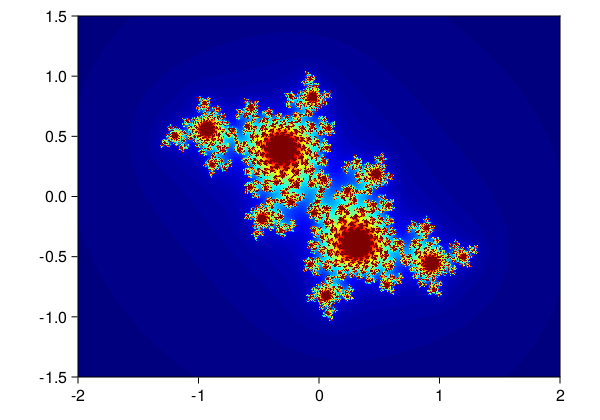

In [101]:
@time heatmaptrappedpoints(z -> z^2 -0.25 + 0.65im, size=(1200,900), limits=(-2,2,-1.5,1.5))

### Y muchas más gráficas...

Por supuesto, hay muchas otras *functions* para graficar datos 2D. Por ejemplo: gráficas de barras, flechas (campos vectoriales), contornos, polígonos, texto, etc!

Todas con su versión *mutable* (terminan con `!` y reciben un objeto "ejes") y con su versión "independiente" (no reciben "ejes").

In [57]:
HTML("""<embed src="https://docs.makie.org/stable/examples/plotting_functions/" width=1000 height=400/>""")

HTML{String}("<embed src=\"https://docs.makie.org/stable/examples/plotting_functions/\" width=1000 height=400/>")

## Guardar gráficos en un archivo

Claro, cualquier gráfico generado se puede guardar en un archivo de imagen vectorial o de pixeles con la *function* `save`.

In [ ]:
save("heatmap.svg", hmfig)
save("heatmap.png", hmfig)

También se puede escalar el gráfico al guardarlo.

In [ ]:
save("heatmap_big.svg", hmfig, pt_per_unit = 2)
save("heatmap_sma.svg", hmfig, pt_per_unit = 0.5)

save("heatmap_big.png", hmfig, px_per_unit = 2)
save("heatmap_sma.png", hmfig, px_per_unit = 0.5)

## Gráficación 3D

Como ya se mencionó, también se pueden generar gráficos 3D interactivos con ***Makie***.

Pero se requiere usar las bibliotecas ***GLMakie*** o ***WGLMakie***. Usemos esta última porque se puede graficar directamente en ***Jupyter***, pues es un ambiente web.

In [ ]:
using WGLMakie

In [ ]:
WGLMakie.activate!() # Se requiere activar, ya que cambiaremos de backend

### `lines` y `scatter`

Análogas a las vistas anteriormente, sólo que ahora se requieren coordenadas de puntos en $\mathbb{R}^3$ y se graficará en 3D.

In [ ]:
figlin3d, axlin3d, pltlin3d = lines([ Point(t*cos(t), t*sin(t), t) for t in 0:0.1:10 ], color=:red)

In [ ]:
figsct3d, axsct3d, pltsct3d = scatter([ Point(t*cos(t), t*sin(t), t) for t in range(0, 10, length=20) ],
    markersize = range(10, 100, length=20),
    color = range(0, 1, length=20), colormap = :thermal)

### `surface`

Se pueden graficar las gráficas de funciones $f:\mathbb{R}^2\rightarrow\mathbb{R}$ con `surface`.

In [ ]:
xs = LinRange(0, 10, 100)
ys = LinRange(0, 10, 100)
zs = [cos(x) * sin(y) * (x-y) for x in xs, y in ys]

surface(xs, ys, zs)

In [ ]:
?surface

### mesh

Con `mesh` se pueden dibujar cualesquiera superficies trianguladas y hasta con texturas. Pero sólo veamos un caso sencillo.

`Sphere` permite dibujar una esfera con cualquier centro y radio.

Adicionalmente, la *function* `wireframe` dibuja las aristas de la triangulación.

In [ ]:
figmesh = Figure(resolution=(800,400))
axmesh = Axis3(figmesh[1,1], aspect = :data, perspectiveness = 0.5) # Ejes tridimensional!

texture = load(Makie.assetpath("earth.png"))

In [ ]:
earth = Sphere(Point3f(0,0,0), 10)
moon = Sphere(Point3f(0,-14,2), 2)

mesh!(axmesh, earth, color = texture)
wireframe!(axmesh, earth, color = RGBA(1,0,0,0.5))
mesh!(axmesh, moon, color = :lightgray)

figmesh

In [ ]:
figmesh2 = Figure(resolution=(800,400))
axmesh2 = Axis3(figmesh2[1,1])

earth_low = uv_normal_mesh(Tesselation(earth, 8)) # Reduciendo el número de vértices y triángulos
moon_low = uv_normal_mesh(Tesselation(moon, 4))

#mesh!(axmesh2, earth_low, color = texture)
#wireframe!(axmesh2, earth_low, color = RGBA(1,0,0,0.5))
mesh!(axmesh2, moon_low, color = :lightgray)

figmesh2

### `volume`

Teniendo una cubo de valores (una matriz 3D), se puede visualizar su interior usando la técnica de *volume render* o visualizar sus capas de isosuperficies. 

In [ ]:
dom = -2:0.05:2
createcube() = [ 0.5x^2 + 0.2y^3 - 0.3z^2 for x in dom, y in dom, z in dom ]

Si tenemos un cubo de tamaño $L\times M \times N$, con valores de punto flotante ($64$ bits = $8$ bytes) y lo representamos con colores `RGBA` (se requiere transparencia, así que serán $4$ bytes por cada valor, $1$ byte por cada componente de color), en total estaremos usando

$$L\times M \times N \times (8+4)=L\times M \times N \times 12$$

bytes en memoria *RAM*. Claro, más toda la memoria adicional de otras variables internas que utilice `volume`.

In [ ]:
N = 81
mem_size = (N^3)*12
println(mem_size, " bytes = ", round(mem_size/1024), " Kb = ", round(mem_size/(1024^2)), " Mb")

Cuad se genera una gran reservación de memoria (como el caso del cubo anterior) que se utliza y pero se deja de utilizar después, esa memoria se queda "colgada" hasta que se cierra el *notebook*.

Para liberar esa memoria "colgada" existe el "recolector de basura" de ***Julia***.

In [ ]:
GC.gc() # Recolector de basura

In [ ]:
?GC.gc()

También se puede liberar la memoria que se ocupó para la salida de una celda anterior (por ejemplo, ¡todo un gráfico!).

In [ ]:
empty!(Out)

In [ ]:
?IJulia.Out

In [ ]:
GC.gc(); empty!(Out) # Limpiando memoria...
figvol, axbol, pltvol = WGLMakie.volume(dom, dom, dom, createcube() )

In [ ]:
GC.gc(); empty!(Out) # Limpiando memoria...
figvol, axbol, pltvol = WGLMakie.volume(dom, dom, dom, createcube() , algorithm=:absorption)

In [ ]:
using Colors, ColorSchemes

In [ ]:
GC.gc(); empty!(Out) # Limpiando memoria...
figvol, axbol, pltvol = WGLMakie.volume(dom, dom, dom, createcube(), algorithm=:absorption,
    colormap=ColorScheme(range(RGBA(1,0.2,0.1,0), RGBA(0.1,0.9,0.8,1), length=2)))

In [ ]:
GC.gc(); empty!(Out) # Limpiando memoria...
figvol, axbol, pltvol = WGLMakie.volume(dom, dom, dom, createcube(), algorithm=:iso, isorange=0.1, isovalue=0.5)

Un ejemplo con datos aleatorios.

In [ ]:
createrandcube() = [ 0.5rand(0:2) for x in 1:10, y in 1:10, z in 1:10 ]

In [ ]:
GC.gc(); empty!(Out) # Limpiando memoria...
figvol, axbol, pltvol = WGLMakie.volume(dom, dom, dom, createrandcube(), algorithm=:absorption,
    colormap=ColorScheme(range(RGBA(1,0.2,0.1,1), RGBA(0.1,0.9,0.8,0), length=2)))

In [ ]:
GC.gc(); empty!(Out) # Limpiando memoria...
figvol, axbol, pltvol = WGLMakie.volume(dom, dom, dom, createrandcube(), algorithm=:iso, isorange=0.05, isovalue=0)

### `contour`

En lugar de un volumen o una sóla isosuperficie, se pueden graficar varias isosuperficies o contornos con `contour`.

In [ ]:
GC.gc(); empty!(Out) # Limpiando memoria...
figvol, axbol, pltvol = contour(dom, dom, dom, createcube())

In [ ]:
GC.gc(); empty!(Out) # Limpiando memoria...
figvol, axbol, pltvol = contour(dom, dom, dom, createrandcube())

### `volumeslices`

También se pueden graficar "rebanadas de volúmenes".

In [ ]:
GC.gc(); empty!(Out) # Limpiando memoria...
figvol, axbol, pltvol = volumeslices(dom, dom, dom, createcube())
pltvol[:update_xy][](20); pltvol[:update_yz][](40); pltvol[:update_xz][](60);
figvol

In [ ]:
GC.gc(); empty!(Out) # Limpiando memoria...
figvol, axbol, pltvol = volumeslices(1:10, 1:10, 1:10, createrandcube(),
    colormap=ColorScheme(range(RGBA(1,0.2,0.1,1), RGBA(0.1,0.9,0.8,0), length=2)))
pltvol[:update_xy][](2); pltvol[:update_yz][](4); pltvol[:update_xz][](6);
figvol

## Extensión de ***Makie***: Recetas

***Makie*** permite un mecanismo de extensión de su biblioteca mediante lo que ellos llaman *recetas*.

Así, podemos crear de manera relativamente fácil *functions* personalizadas de graficación integradas perfectamente a ***Makie***.

Esta integración permitirá flexibilidad en la creación y modificación de nuestros gráficos personalizados.

Para el mecanismo de extensión, se usa la macro `@recipe` y la implementación de la *function* de graficación personalizada en versión mutable (finaliza con `!`).

Veamos como funciona todo esto con un ejemplo concreto: el dibujo de conjuntos de puntos atrapados.

In [63]:
GC.gc(); empty!(Out) # Limpiando memoria...
using CairoMakie, Colors, ColorSchemes
import Images

### `@recipe`

Recordemos que los *macros* son instrucciones en ***Julia*** para metaprogramación: programas que crean programas.

Con la macro `@recipe` se crean tipos compuestos, constantes y *functions*/métodos "plantilla" para nuestro gráfico personalizado.

Ejemplo: Análisis grráfico de una función $f:\mathbb{R}\rightarrow\mathbb{R}$.

In [64]:
@recipe(GraphicalAnalysis) do scene
    # Atributos: Argumentos palabra clave adicionales para este gráfico personalizado    
    Attributes(
        iterations = 20, # Número de Iteraciones para la órbita
        orbit_color = :red, # Color de la órbita
        orbit_colormap = :jet, # Mapa de color para la órbita
        id = true, # Si se dibujará la diagonal de la identidad
        id_color = :gray # Color de la diagonal de la identidad
    )
end

Dentro del bloque `do scene` ... `end` también se puede especificar un "tema de graficación default" con `Theme(...)`.

In [65]:
?GraphicalAnalysis

search: GraphicalAnalysis graphicalanalysis graphicalanalysis!



No documentation found.

# Summary

```
struct Combined{graphicalanalysis, ArgType}
```

# Fields

```
parent         :: Union{AbstractScene, MakieCore.ScenePlot}
transformation :: MakieCore.Transformable
attributes     :: Attributes
input_args     :: Tuple
converted      :: Tuple
plots          :: Vector{AbstractPlot}
```

# Supertype Hierarchy

```
Combined{graphicalanalysis, ArgType} <: MakieCore.ScenePlot{graphicalanalysis} <: AbstractPlot{graphicalanalysis} <: MakieCore.Transformable <: Any
```


### `plot!`

La *function* `plot!` será la que contenga la implementación de nuestro gráfico personalizado.

(Técnicamente:

En realidad se crea un nuevo método para nuestro gráfico personalizado de la *function* `plot!`.

La *function* `plot!` es con la cuál ¡se crean todos los tipos de gráficos en ***Makie***!)

In [66]:
# La function plot! en la biblioteca Makie, que no ha sido cargada explícitamente...
function Makie.plot!(plt::GraphicalAnalysis{<:Tuple{Function, Real, AbstractVector{<:Real}}})
    # La parametrización de tipos "{<:Tuple{Function, Real, AbstractVector{<:Real}}}"
    # nos garantiza que siempre se reciba una función, un valor real y los límites de coordenadas como arreglos o rangos

    # Obteniendo la función, el valor punto inicial  y límites de coordenadas
    # Lo que tenemos es una tupla de "observables", que son útiles en animaciones e interactivos.
    # Para hacer este gráfico apto para animaciones e interactivos, habría que hacer más cosas,
    # no veremos como, pero no se preocupen por eso en este momento, no lo utilizarán.
    f = plt[1][] # La función...
    obs_x0 = plt[2] # El segundo observable, que contiene un número real
    x0 = obs_x0[] # Con el operador [], se obtiene el contenido del observable, en este caso, el número
    obs_xs = plt[3] # El tercer observable, que contiene un arreglo o rango
    xs = obs_xs[] # Con el operador [], se obtiene el contenido del observable, en este caso, el arreglo o rango

    # Obteniendo los objetos o valores adicionales útiles que son los atributos "observables"
    its = plt.iterations[] # Número de iteteraciones para la órbita
    orb_color = plt.orbit_color[] # Color de la órbita
    orb_cm = plt.orbit_colormap[] # Mapa de color de la órbita
    id = plt.id[] # Dibujar identidad
    id_color = plt.id_color[] # Color de la identidad
    
    # Ahora ya podemos crear la gráfica personalizada, usando gráficas de Makie, claro
    
    # Gráfica de f
    lines!(plt, obs_xs, f; plt.attributes.attributes...)
    # Con "plt.attributes.attributes..." se le pasan los argumentos palabra clave a lines!
    
    # Gráfica de la identidad
    if id
        lines!(plt, obs_xs, obs_xs, color = id_color)
    end

    # Implementación del algoritmo para crear la lista de puntos para el anális gráfico de la órbita de x0
    x, fx = x0, 0
    orbit = [Point(x,fx)]
    for n in 1:its
        push!(orbit, Point(x,x))
        fx = f(x)
        push!(orbit, Point(x,fx))
        x = fx
    end
    
    # Dibujo de la órbita de x0
    lines!(plt, orbit, color = orb_color, colormap = orb_cm)    

    # Se regresa el mismo objeto plt, pero ya está personalizado
    plt
end

¡Y listo: Ya podemos usar nuestro gráfico personalizado!

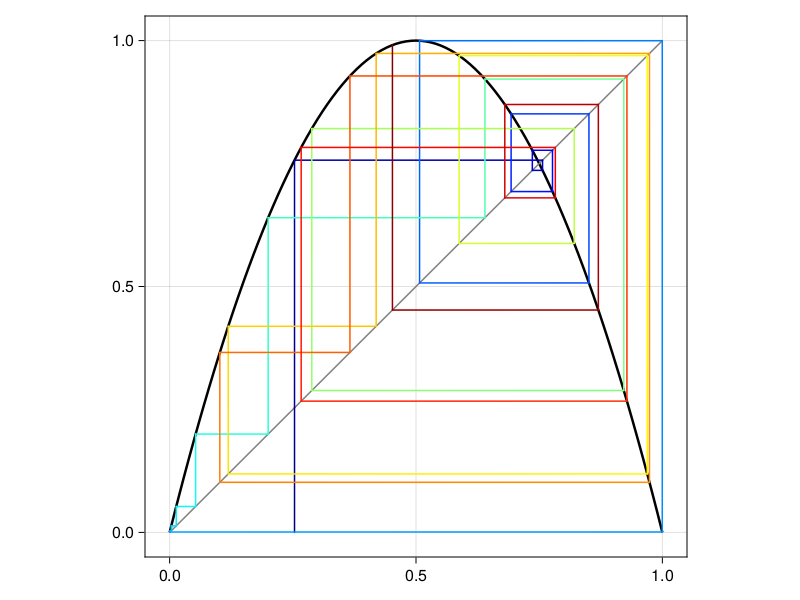

In [67]:
L4(x) = 4x*(1-x)
graphicalanalysis(L4, 0.253452435, 0:0.01:1, iterations=30, orbit_color=range(0,1,61), orbit_colormap=:jet,
    color=:black, linewidth=2.5, axis=(; aspect=1))

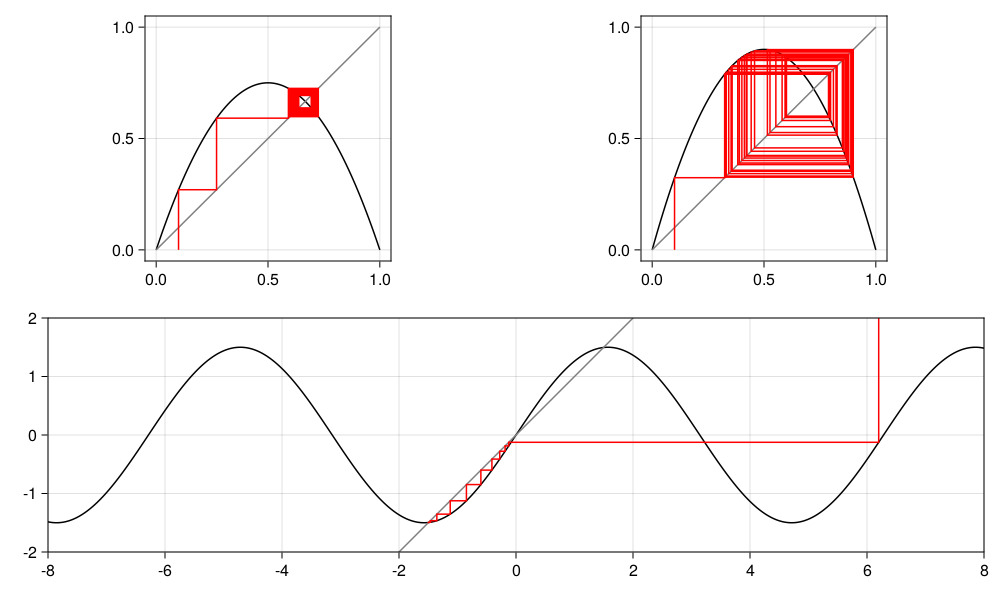

In [68]:
figag = Figure(resolution=(1000,600))
axag1 = Axis(figag[1,1], aspect=1); graphicalanalysis!(axag1, x -> 3x*(1-x), 0.1, 0:0.01:1, iterations=60)
axag2 = Axis(figag[1,2], aspect=1); graphicalanalysis!(axag2, x -> 3.6x*(1-x), 0.1, 0:0.01:1, iterations=40)
axag3 = Axis(figag[2,1:2], limits=(-8,8,-2,2), aspect=4); graphicalanalysis!(axag3, x -> 1.5sin(x), 6.2, -10:0.02:10, iterations=20) 
figag

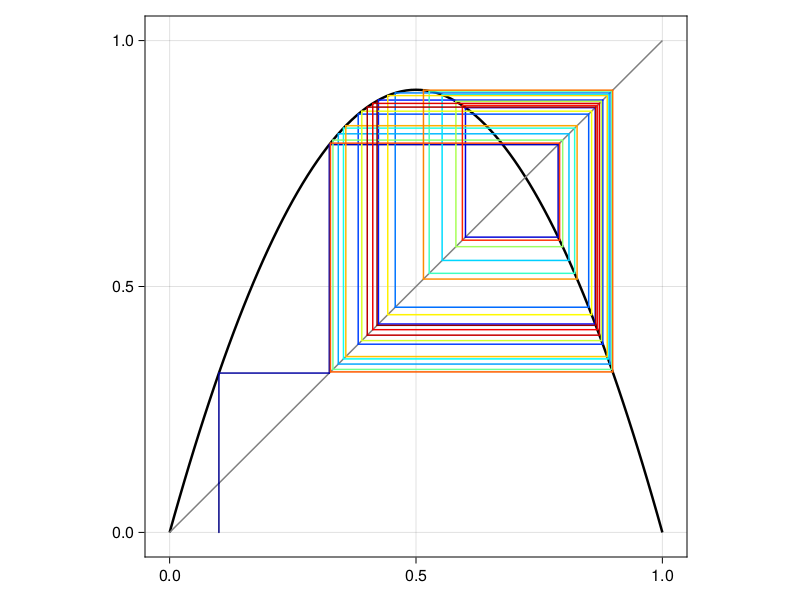

In [69]:
L(x::Real) = 3.6x*(1-x)
xdom = 0:0.01:1
myfigag, myaxag, mypltag = graphicalanalysis(L, 0.1, xdom, iterations=40,
    orbit_color=range(0,1,81), orbit_colormap=:jet, linewidth=2.5, axis=(; aspect=1))

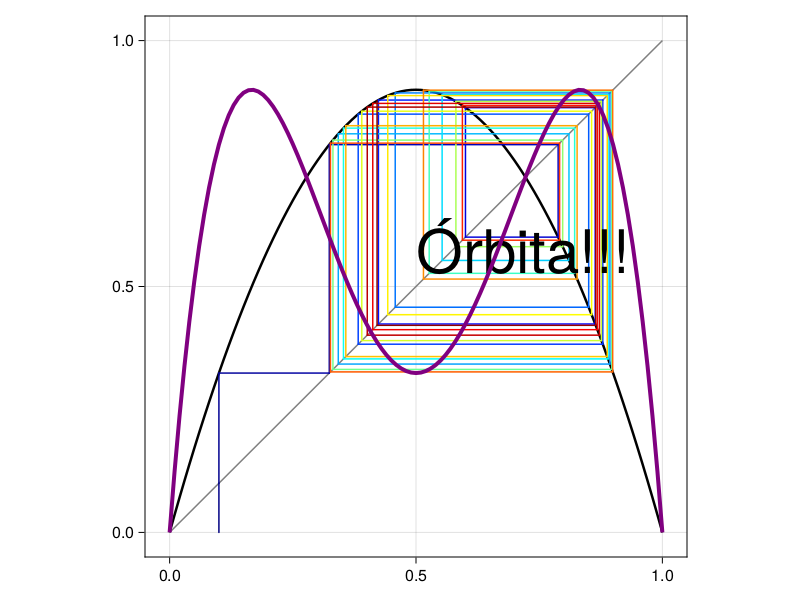

In [70]:
text!(myaxag, 0.5,0.5, text="Órbita!!!", fontsize=60, color=:black)
lines!(myaxag, xdom, x -> L(L(x)), color = :purple, linewidth=4)
myfigag

Otro ejemplo: Conjuntos de puntos atrapados en $\mathbb{C}$.

In [71]:
@recipe(PlotTrappedPoints) do scene
    # Atributos: Argumentos palabra clave adicionales para este gráfico personalizado
    Attributes(
        maxiterations = 100, # Número máximo de iteraciones
        hasescaped = z -> abs2(z) > 4, # Function para determinar cuando un punto escapa
        pointfunc = (x,y) -> complex(x,y) # Función de conversión de puntos. Para R2: (x,y) -> [x,y]
    )
end

Para este tipo de algoritmos que trabajan naturalmente con imágenes de pixeles, para nuestro ecosistema ***SDD*** crearemos primero una *function* que implemente el algoritmo "genérico" que cree una matriz cuyas entradas son los tiempos de escape.

Después, se harán 2 implementaciones:
- La *function* que creará la imagen de pixeles.
- La *function* `plot!` que la usará `heatmap`.

Así, los usuarios del ecosisema SDD podrán elegir entre usar ***Makie*** para los gráficos o crear imágenes directamente (sin ***Makie***).

Una implementación "genérica" del algoritmo de creación del conjunto de puntos atrapados usando el tiempo de escape.

In [81]:
function matrixtrappedpoints(f::Function, xs::AbstractVector{<:Real}, ys::AbstractVector{<:Real};
    pointfunc::Function, escapetime::Function, matrixinverted = false,
    maxiterations::Int = 100, hasescaped::Function = p -> abs2(p) > 4)
        
    # Una implementación del algoritmo de dibujo de puntos atrapados por tiempo de escape
    w, h = length(xs), length(ys)
    mtrx = matrixinverted ? fill(escapetime(maxiterations), w, h) : fill(escapetime(maxiterations), h, w)

    n = matrixinverted ? 1 : h
    ninc = matrixinverted ? 1 : -1
    for y in ys
        m = 1
        for x in xs
            p = pointfunc(x,y)
            for k in 0:maxiterations
                if hasescaped(p)
                    #mtrx[n,m] = escapetime(k)
                    if matrixinverted
                        mtrx[m,n] = escapetime(k)
                    else
                        mtrx[n,m] = escapetime(k)
                    end
                    break
                end
                p = f(p)
            end
            m += 1
        end
        n += ninc
    end
        
    mtrx
end

matrixtrappedpoints (generic function with 1 method)

Una implementación del algoritmo de dibujo del conjunto de puntos atrapados usando el tiempo de escape, sobre una imagen de pixeles.

In [82]:
function imgtrappedpoints(f::Function, xs::AbstractVector{<:Real}, ys::AbstractVector{<:Real};
    pointfunc::Function = (x,y) -> complex(x,y), maxiterations::Int = 100, hasescaped::Function = z -> abs2(z) > 4,
    colormap::Union{Symbol, Vector{<:Colorant}} = :viridis )
    
    cm = typeof(colormap) == Symbol ? colorschemes[colormap] : ColorScheme(colormap)
    
    # La función de tiempo de escape regresa un color (del mapa de color)
    matrixtrappedpoints(f, xs, ys, pointfunc = pointfunc, maxiterations = maxiterations,
        escapetime = k -> cm[k/maxiterations], hasescaped = hasescaped)
end

imgtrappedpoints (generic function with 1 method)

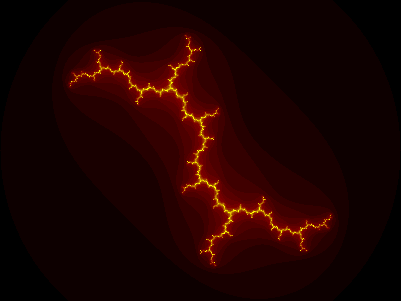

In [83]:
imgtrappedpoints(z->z^2+im, -2:0.01:2, -1.5:0.01:1.5, maxiterations=20,
    colormap = [RGB(0,0,0), RGB(0.5,0,0), RGB(1,1,0) ] )

Ahora la gráfica personalizada usando `heatmap`...

In [84]:
function Makie.plot!(
    plt::PlotTrappedPoints{<:Tuple{Function, AbstractVector{<:Real}, AbstractVector{<:Real}}})
    # La parametrización de tipos "{<:Tuple{<:Function, AbstractVector{<:Real}, AbstractVector{<:Real}}}"
    # nos garantiza que siempre se reciba una función y los límites de coordenadas como arreglos o rangos

    # Obteniendo la función y límites de coordenadas    
    f = plt[1][] # La función
    obs_xs = plt[2] 
    xs = obs_xs[] # El arreglo o rango de las xs
    obs_ys = plt[3]
    ys = obs_ys[] # El arreglo o rango de las ys
    
    # Obteniendo los objetos o valores adicionales útiles que son los atributos "observables"    
    maxits = plt.maxiterations[] # Atributo número máximo de iteraciones
    hasesc = plt.hasescaped[] # Función de verificación de escape
    pfunc = plt.pointfunc[] # Función de creación de punto
     
    # La gráfica personalizada usando mapa de color
    heatmap!(plt, obs_xs, obs_ys,
        matrixtrappedpoints(f, xs, ys, pointfunc = pfunc, maxiterations = maxits,
            escapetime = k -> k, hasescaped = hasesc, matrixinverted=true);
        plt.attributes.attributes...)
    
    # Se regresa el mismo objeto plt personalizado
    plt
end

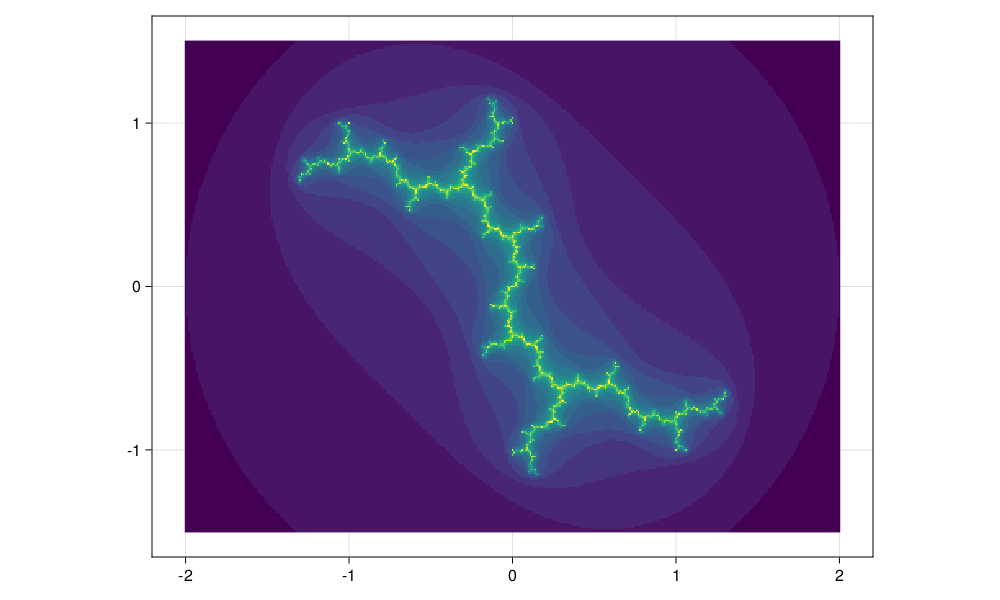

In [85]:
xlims, ylims = -2:0.01:2, -1.5:0.01:1.5
plottrappedpoints(z -> z^2 + im, xlims, ylims, maxiterations = 20,
    figure=(; resolution=(1000,600)), axis=(; aspect=DataAspect()) )

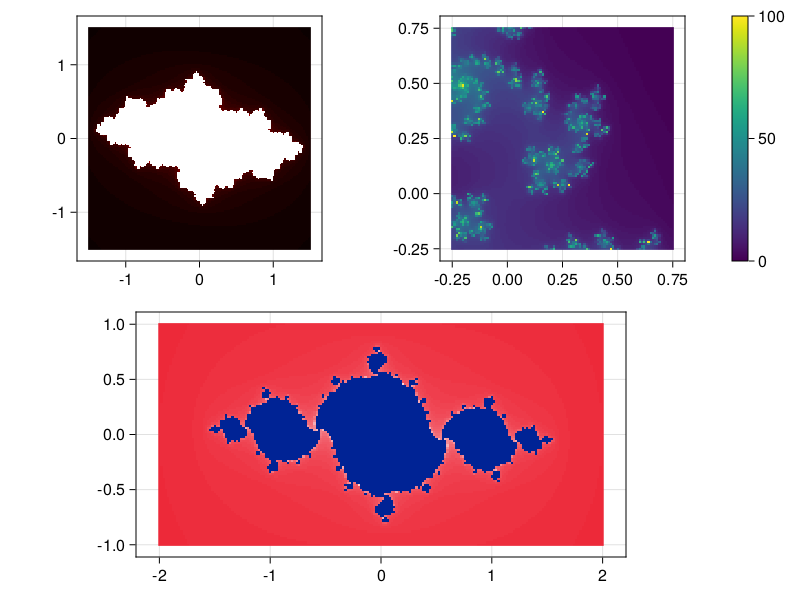

In [86]:
figq = Figure(resolution=(800,600))
axq1 = Axis(figq[1,1], aspect=1); plt1 = plottrappedpoints!(axq1, z -> z^2 -0.6 + 0.2im, -1.5:0.02:1.5, -1.5:0.02:1.5, colormap=:hot)
axq2 = Axis(figq[1,2], aspect=1); plt2 = plottrappedpoints!(axq2, z -> z^2 -0.01 + 0.7im, -0.25:0.01:0.75, -0.25:0.01:0.75)
Colorbar(figq[1,3], colormap=:viridis, colorrange=(0,100)) # Aquí hay que especificar mapa y rango de color
axq3 = Axis(figq[2,1:2], aspect=2); plottrappedpoints!(axq3, z -> z^2 -0.9 + 0.1im, -2:0.02:2, -1:0.02:1, colormap=:flag_fr)
figq

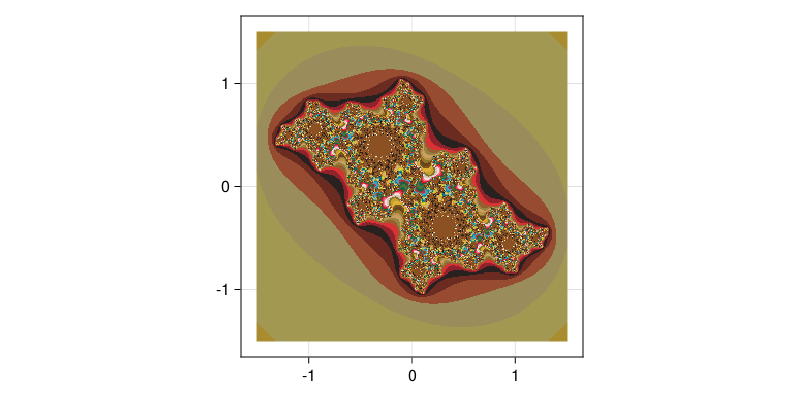

In [91]:
myfig, myax, myplt = plottrappedpoints(z -> z^2 -0.25 + 0.65im, -1.5:0.01:1.5, -1.5:0.01:1.5,
    maxterations = 200,
    figure=(; resolution=(800,400)), axis=(; aspect=1), colormap=:flag_mx )

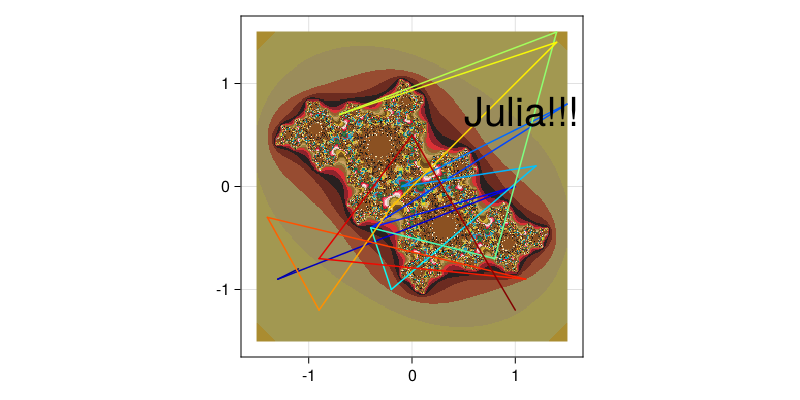

In [92]:
lines!(myax, rand(-1.5:0.1:1.5, 20), rand(-1.5:0.1:1.5, 20), color=range(0,1,20), colormap=:jet)
text!(myax, 0.5,0.5, text="Julia!!!", fontsize=40, color=:black)
myfig

In [89]:
# Fin!